In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#df_Duane = pd.read_csv('../Unpol_proposal/Materials/Duan_output.txt',delim_whitespace=True)
df_Duane = pd.read_csv('../Unpol_proposal/Materials/Duan_output_1xs.txt',delim_whitespace=True)
df_Duane.head()

,set,Ebeam,beam_P,Target_P,x,y,z,pT2,phih,phis,...,amm,nrad_ir,rad_f,rad_f_err,nrad,nrad_err,rad,rad_err,nrad_rad,nrad_rad_err
0,0,11.0,U,U,0.4,0.48,0.5,0.160,-3.0,1,...,-1.730620e-15,1.803628e-06,3.363868e-10,1.597661e-13,1.803964e-06,1.597661e-13,7.335313e-07,4.557834e-10,2.537495e-06,4.559431e-10
1,0,11.0,U,U,0.4,0.48,0.5,0.400,-3.0,1,...,-6.936374e-16,7.333848e-07,1.097780e-09,2.209658e-13,7.344825e-07,2.209658e-13,3.295079e-07,3.488489e-10,1.063990e-06,3.490698e-10
2,0,11.0,U,U,0.4,0.48,0.5,0.632,-3.0,1,...,-2.866150e-16,3.068765e-07,8.398873e-10,2.011800e-13,3.077164e-07,2.011800e-13,1.461459e-07,1.707109e-10,4.538623e-07,1.709120e-10
3,0,11.0,U,U,0.4,0.48,0.5,0.160,-2.5,1,...,-1.730620e-15,1.795783e-06,-1.846311e-10,1.861111e-13,1.795599e-06,1.861111e-13,7.154870e-07,5.187951e-10,2.511086e-06,5.189813e-10
4,0,11.0,U,U,0.4,0.48,0.5,0.400,-2.5,1,...,-6.936374e-16,7.273101e-07,6.629963e-10,1.358838e-13,7.279731e-07,1.358838e-13,3.124194e-07,2.388244e-10,1.040392e-06,2.389603e-10


In [3]:
df_Tianbo = pd.read_csv('../Unpol_proposal/Materials/Tianbo_3xs.txt',delim_whitespace=True)
df_Tianbo.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,5.75,0.2,-3.0,0.93,0.5,2.0,0.4,FUUT,0.000046,0.0001,0.0,0.0,neutron,pi+,solid,0.0001
1,0,5.75,0.2,-2.5,0.93,0.5,2.0,0.4,FUUT,0.000044,0.0001,0.0,0.0,neutron,pi+,solid,0.0001
2,0,5.75,0.2,-2.0,0.93,0.5,2.0,0.4,FUUT,0.000040,0.0001,0.0,0.0,neutron,pi+,solid,0.0001
3,0,5.75,0.2,-1.5,0.93,0.5,2.0,0.4,FUUT,0.000035,0.0001,0.0,0.0,neutron,pi+,solid,0.0001
4,0,5.75,0.2,-1.0,0.93,0.5,2.0,0.4,FUUT,0.000030,0.0001,0.0,0.0,neutron,pi+,solid,0.0001


In [4]:
for i,row in df_Duane.iterrows():
    born = row['born']
    nrad = row['nrad']
    rad = row['rad']
    tot = row['nrad_rad']
    #results = (nrad-born+rad)/born
    results = (tot-born)/tot
    #print((results))

In [5]:
df_Duane_1 = df_Duane[(df_Duane['Target_P']=='U')&(df_Duane['Ebeam']==11)&(df_Duane['x']==0.4)&(df_Duane['pT2']==0.632)&(df_Duane['y']==0.48)]
phih_Duane = df_Duane_1['phih']
value_Duane = df_Duane_1['born']
rc_Duane = df_Duane_1['nrad_rad']
print(df_Duane_1)

    set  Ebeam beam_P Target_P    x     y    z    pT2  phih  phis  ...   
2     0   11.0      U        U  0.4  0.48  0.5  0.632  -3.0     1  ...  \
5     0   11.0      U        U  0.4  0.48  0.5  0.632  -2.5     1  ...   
8     0   11.0      U        U  0.4  0.48  0.5  0.632  -2.0     1  ...   
11    0   11.0      U        U  0.4  0.48  0.5  0.632  -1.5     1  ...   
14    0   11.0      U        U  0.4  0.48  0.5  0.632  -1.0     1  ...   
17    0   11.0      U        U  0.4  0.48  0.5  0.632  -0.5     1  ...   
20    0   11.0      U        U  0.4  0.48  0.5  0.632   0.0     1  ...   
23    0   11.0      U        U  0.4  0.48  0.5  0.632   0.5     1  ...   
26    0   11.0      U        U  0.4  0.48  0.5  0.632   1.0     1  ...   
29    0   11.0      U        U  0.4  0.48  0.5  0.632   1.5     1  ...   
32    0   11.0      U        U  0.4  0.48  0.5  0.632   2.0     1  ...   
35    0   11.0      U        U  0.4  0.48  0.5  0.632   2.5     1  ...   
38    0   11.0      U        U  0.4  0

In [6]:
df_Duane_2 = df_Duane[(df_Duane['Target_P']=='U')&(df_Duane['Ebeam']==11)&(df_Duane['x']==0.4)&(df_Duane['pT2']==0.16)&(df_Duane['y']==0.48)]
phih_Duane_2 = df_Duane_2['phih']
value_Duane_2 = df_Duane_2['born']
rc_Duane_2 = df_Duane_2['nrad_rad']
print(df_Duane_2)

    set  Ebeam beam_P Target_P    x     y    z   pT2  phih  phis  ...   
0     0   11.0      U        U  0.4  0.48  0.5  0.16  -3.0     1  ...  \
3     0   11.0      U        U  0.4  0.48  0.5  0.16  -2.5     1  ...   
6     0   11.0      U        U  0.4  0.48  0.5  0.16  -2.0     1  ...   
9     0   11.0      U        U  0.4  0.48  0.5  0.16  -1.5     1  ...   
12    0   11.0      U        U  0.4  0.48  0.5  0.16  -1.0     1  ...   
15    0   11.0      U        U  0.4  0.48  0.5  0.16  -0.5     1  ...   
18    0   11.0      U        U  0.4  0.48  0.5  0.16   0.0     1  ...   
21    0   11.0      U        U  0.4  0.48  0.5  0.16   0.5     1  ...   
24    0   11.0      U        U  0.4  0.48  0.5  0.16   1.0     1  ...   
27    0   11.0      U        U  0.4  0.48  0.5  0.16   1.5     1  ...   
30    0   11.0      U        U  0.4  0.48  0.5  0.16   2.0     1  ...   
33    0   11.0      U        U  0.4  0.48  0.5  0.16   2.5     1  ...   
36    0   11.0      U        U  0.4  0.48  0.5  0.1

In [7]:
df_Duane_3 = df_Duane[(df_Duane['Target_P']=='U')&(df_Duane['Ebeam']==11)&(df_Duane['x']==0.4)&(df_Duane['pT2']==0.4)&(df_Duane['y']==0.48)]
phih_Duane_3 = df_Duane_3['phih']
value_Duane_3 = df_Duane_3['born']
rc_Duane_3 = df_Duane_3['nrad_rad']
print(df_Duane_3)

    set  Ebeam beam_P Target_P    x     y    z  pT2  phih  phis  ...   
1     0   11.0      U        U  0.4  0.48  0.5  0.4  -3.0     1  ...  \
4     0   11.0      U        U  0.4  0.48  0.5  0.4  -2.5     1  ...   
7     0   11.0      U        U  0.4  0.48  0.5  0.4  -2.0     1  ...   
10    0   11.0      U        U  0.4  0.48  0.5  0.4  -1.5     1  ...   
13    0   11.0      U        U  0.4  0.48  0.5  0.4  -1.0     1  ...   
16    0   11.0      U        U  0.4  0.48  0.5  0.4  -0.5     1  ...   
19    0   11.0      U        U  0.4  0.48  0.5  0.4   0.0     1  ...   
22    0   11.0      U        U  0.4  0.48  0.5  0.4   0.5     1  ...   
25    0   11.0      U        U  0.4  0.48  0.5  0.4   1.0     1  ...   
28    0   11.0      U        U  0.4  0.48  0.5  0.4   1.5     1  ...   
31    0   11.0      U        U  0.4  0.48  0.5  0.4   2.0     1  ...   
34    0   11.0      U        U  0.4  0.48  0.5  0.4   2.5     1  ...   
37    0   11.0      U        U  0.4  0.48  0.5  0.4   3.0     1 

In [8]:
df_Tianbo_1 = df_Tianbo[(df_Tianbo['Ebeam']==11)&(df_Tianbo['x']==0.4)&(df_Tianbo['pT']==0.4)&(df_Tianbo['y']==0.48)]
phih_Tianbo = df_Tianbo_1['phih']
value_Tianbo = df_Tianbo_1['value']
print(df_Tianbo_1)

    i  Ebeam    x  phih     y    z   Q2   pT   obs     value    stat  systrel   
13  0   11.0  0.4  -3.0  0.48  0.5  4.0  0.4  FUUT  0.000016  0.0001      0.0  \
14  0   11.0  0.4  -2.5  0.48  0.5  4.0  0.4  FUUT  0.000014  0.0001      0.0   
15  0   11.0  0.4  -2.0  0.48  0.5  4.0  0.4  FUUT  0.000012  0.0001      0.0   
16  0   11.0  0.4  -1.5  0.48  0.5  4.0  0.4  FUUT  0.000009  0.0001      0.0   
17  0   11.0  0.4  -1.0  0.48  0.5  4.0  0.4  FUUT  0.000006  0.0001      0.0   
18  0   11.0  0.4  -0.5  0.48  0.5  4.0  0.4  FUUT  0.000004  0.0001      0.0   
19  0   11.0  0.4   0.0  0.48  0.5  4.0  0.4  FUUT  0.000003  0.0001      0.0   
20  0   11.0  0.4   0.5  0.48  0.5  4.0  0.4  FUUT  0.000004  0.0001      0.0   
21  0   11.0  0.4   1.0  0.48  0.5  4.0  0.4  FUUT  0.000006  0.0001      0.0   
22  0   11.0  0.4   1.5  0.48  0.5  4.0  0.4  FUUT  0.000009  0.0001      0.0   
23  0   11.0  0.4   2.0  0.48  0.5  4.0  0.4  FUUT  0.000012  0.0001      0.0   
24  0   11.0  0.4   2.5  0.4

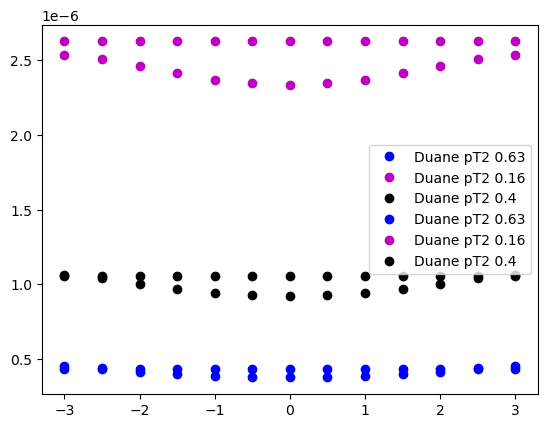

In [9]:
plt.plot(phih_Duane,np.asarray(value_Duane),'bo',label='Duane pT2 0.63')
plt.plot(phih_Duane_2,np.asarray(value_Duane_2),'mo',label='Duane pT2 0.16')
plt.plot(phih_Duane_3,np.asarray(value_Duane_3),'ko',label='Duane pT2 0.4')
plt.plot(phih_Duane,np.asarray(rc_Duane),'bo',label='Duane pT2 0.63')
plt.plot(phih_Duane_2,np.asarray(rc_Duane_2),'mo',label='Duane pT2 0.16')
plt.plot(phih_Duane_3,np.asarray(rc_Duane_3),'ko',label='Duane pT2 0.4')
#plt.plot(phih_Tianbo,np.asarray(value_Tianbo)/(2*math.pi),'ro',label='Tianbo pT 0.4')
plt.legend()
plt.savefig('../Unpol_proposal/Materials/Compare_UU.pdf')

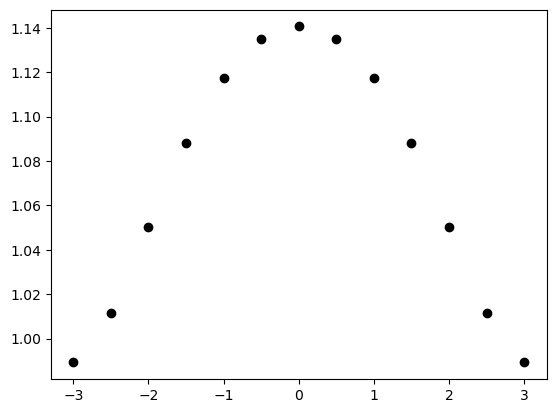

In [10]:
plt.plot(phih_Duane_3,np.asarray(value_Duane_3)/np.asarray(rc_Duane_3),'ko',label='Duane pT2 0.4')

    set  Ebeam beam_P Target_P      x     y     z  pT2  phih  phis  ...   
52    0   11.0      U        U  0.225  0.59  0.55  0.1  -3.0     1  ...  \
53    0   11.0      U        U  0.225  0.59  0.55  0.1  -2.5     1  ...   
54    0   11.0      U        U  0.225  0.59  0.55  0.1  -2.0     1  ...   
55    0   11.0      U        U  0.225  0.59  0.55  0.1  -1.5     1  ...   
56    0   11.0      U        U  0.225  0.59  0.55  0.1  -1.0     1  ...   
57    0   11.0      U        U  0.225  0.59  0.55  0.1  -0.5     1  ...   
58    0   11.0      U        U  0.225  0.59  0.55  0.1   0.0     1  ...   
59    0   11.0      U        U  0.225  0.59  0.55  0.1   0.5     1  ...   
60    0   11.0      U        U  0.225  0.59  0.55  0.1   1.0     1  ...   
61    0   11.0      U        U  0.225  0.59  0.55  0.1   1.5     1  ...   
62    0   11.0      U        U  0.225  0.59  0.55  0.1   2.0     1  ...   
63    0   11.0      U        U  0.225  0.59  0.55  0.1   2.5     1  ...   
64    0   11.0      U    

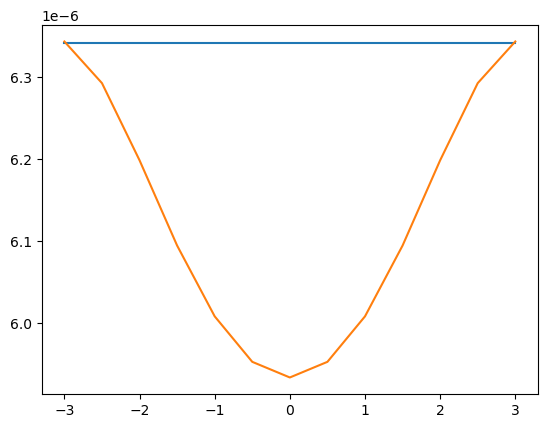

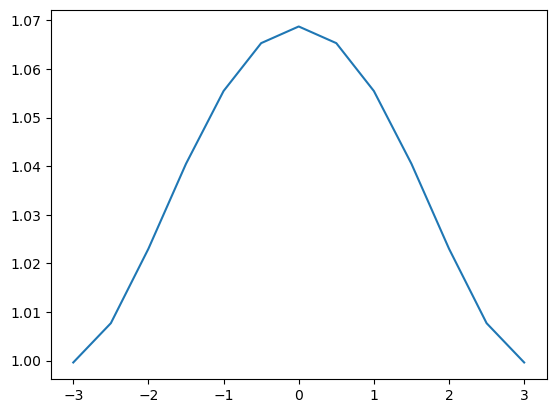

In [11]:
df_Duane_4 = df_Duane[(df_Duane['Target_P']=='U')&(df_Duane['Ebeam']==11)&(df_Duane['x']==0.225)]
phih_Duane_4 = df_Duane_4['phih']
value_Duane_4 = df_Duane_4['born']
rc_Duane_4 = df_Duane_4['nrad_rad']
print(df_Duane_4)
plt.plot(phih_Duane_4,value_Duane_4)
plt.plot(phih_Duane_4,rc_Duane_4)
plt.figure()
plt.plot(phih_Duane_4,np.asarray(value_Duane_4)/np.asarray(rc_Duane_4))
